<center>
    <p> <B>Auteur</B> : </p> 
    <p style="color: blue"> <B>Souleymane BA</B></p> 
    <p> <B>Nom du package</B> :  </p>
    <p style="color: blue"> <B>autolearn</B></p> 
    
</center> <br/> 




Le package `autolearn` vise à simplifier et accélérer le processus de création de modèles prédictifs en mettant à disposition une boîte à outils d'automatisation pour l'apprentissage automatique, en minimisant la quantité de code nécessaire. 

Les fonctionnalités clés du package comprennent :

<p style="color: blue"> <B>Imputation des valeurs manquantes </B>:</p> 

Il permet d'automatiser l'imputation des valeurs manquantes dans les données.

<p style="color: blue"> <B> Transformation des Variables Numériques </B>:</p> 

Il permet d'appliquer des transformations telles que la log-transformation pour normaliser la distribution des variables. De plus, il effectue une standardisation pour ramener les valeurs dans une plage fixe de [0, 1]. Ces étapes sont essentielles pour les modèles paramétriques comme les modèles linéaires.

<p style="color: blue"> <B>Gestion des Variables Catégorielles </B>:</p> 

Il adopte une approche différenciée. Il applique le one-hot-encoding pour certaines variables catégorielles, tandis que pour d'autres, il remplace chaque modalité par sa fréquence. Cela est particulièrement crucial pour les variables comportant de nombreuses modalités afin d'éviter une explosion du nombre de variables lors de l'entraînement des modèles.

<p style="color: blue"> <B>Entraînement de Modèles</B>:</p> 

Une fois les données correctement préparées, `autolearn` permet d'entraîner ces données sur une variété d'algorithmes de machine learning.

<p style="color: blue"> <B>Comparaison des Modèles</B>:</p>

Il compare ensuite leurs performances, facilitant ainsi la sélection du meilleur modèle pour les prédictions sur les données de test.

In [2]:
import os
from pathlib import Path
import numpy as np

In [5]:
os.chdir("../")
os.chdir("../")
os.getcwd()

'c:\\Users\\jules\\OneDrive\\Documents\\MachineLearningAv\\autolearn'

In [29]:
from autolearn import DataImputer
from autolearn import DataTransformer
from autolearn import ModelTrainer
from autolearn import load_data

from sklearn.model_selection import train_test_split

In [140]:
data_path = Path.cwd()/"test"/"data"/"raw"/"data.csv"
target_path = Path.cwd()/"test"/"data"/"raw"/"target.csv"

data = load_data(data_path)
target = load_data(target_path)

trainset, testset, train_target, test_target = train_test_split(data, target, 
                                                               random_state=42, 
                                                               shuffle=True, test_size=0.2)

train_target.to_csv("./test/data/raw/train_target.csv", index=False)
trainset.to_csv("./test/data/raw/train.csv", index=False)

testset.to_csv("./test/data/raw/test.csv", index=False)
test_target.to_csv("./test/data/raw/test_target.csv", index=False)

In [141]:
train_path = Path("./test/data/raw/train.csv")
train_target_path = Path("./test/data/raw/train_target.csv")

test_path = Path("./test/data/raw/test.csv")
test_target_path = Path("./test/data/raw/test_target.csv")

# Charger les données

In [142]:
df_train = load_data(train_path).set_index("Id")
df_train_target = load_data(train_target_path).set_index("Id")

df_test = load_data(test_path).set_index("Id")
df_test_target = load_data(test_target_path).set_index("Id")

In [143]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
2651,160,RL,24.0,2179,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
1710,20,FV,75.0,7500,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
870,60,RL,80.0,9938,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,NaN,0,6,2010,WD,Normal
2356,20,RL,60.0,12450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal


In [144]:
print(f"train : {df_train.shape}")
print(f"test : {df_test.shape}")

train : (2335, 79)
test : (584, 79)


# Démonstration

## Imputation

In [145]:
imputer = DataImputer()

### Les valeurs manquantes dans les colonnes catégorielles

In [146]:
categorical_missing_values = imputer.get_missing_categorical_columns(df_train)

[2023-10-15 16:49:07,543: INFO: data_imputer] - Il y a 43 colonnes catégorielles dans le jeu de données.
[2023-10-15 16:49:07,553: INFO: data_imputer] - Il y a 23 colonnes catégorielles avec des valeurs manquantes.
[2023-10-15 16:49:07,562: INFO: data_imputer] - La colonne 'MSZoning' a 1 valeurs manquantes.
[2023-10-15 16:49:07,563: INFO: data_imputer] - La colonne 'Alley' a 2187 valeurs manquantes.
[2023-10-15 16:49:07,564: INFO: data_imputer] - La colonne 'Utilities' a 1 valeurs manquantes.
[2023-10-15 16:49:07,567: INFO: data_imputer] - La colonne 'Exterior1st' a 1 valeurs manquantes.
[2023-10-15 16:49:07,569: INFO: data_imputer] - La colonne 'Exterior2nd' a 1 valeurs manquantes.
[2023-10-15 16:49:07,571: INFO: data_imputer] - La colonne 'MasVnrType' a 1416 valeurs manquantes.
[2023-10-15 16:49:07,575: INFO: data_imputer] - La colonne 'BsmtQual' a 62 valeurs manquantes.
[2023-10-15 16:49:07,575: INFO: data_imputer] - La colonne 'BsmtCond' a 62 valeurs manquantes.
[2023-10-15 16:49:0

In [147]:
categorical_missing_values

{'MSZoning': 1,
 'Alley': 2187,
 'Utilities': 1,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'MasVnrType': 1416,
 'BsmtQual': 62,
 'BsmtCond': 62,
 'BsmtExposure': 62,
 'BsmtFinType1': 60,
 'BsmtFinType2': 60,
 'Electrical': 1,
 'KitchenQual': 1,
 'Functional': 1,
 'FireplaceQu': 1121,
 'GarageType': 126,
 'GarageFinish': 128,
 'GarageQual': 128,
 'GarageCond': 128,
 'PoolQC': 2327,
 'Fence': 1876,
 'MiscFeature': 2247,
 'SaleType': 1}

### Les valeurs manquantes dans les colonnes numériques

In [148]:
numerical_missing_values = imputer.get_missing_numerical_columns(df_train)

[2023-10-15 16:49:10,018: INFO: data_imputer] - Il y a 36 colonnes numériques dans le jeu de données.
[2023-10-15 16:49:10,025: INFO: data_imputer] - Il y a 11 colonnes numériques avec des valeurs manquantes.
[2023-10-15 16:49:10,029: INFO: data_imputer] - La colonne 'LotFrontage' a 377 valeurs manquantes.
[2023-10-15 16:49:10,029: INFO: data_imputer] - La colonne 'MasVnrArea' a 21 valeurs manquantes.
[2023-10-15 16:49:10,034: INFO: data_imputer] - La colonne 'BsmtFinSF1' a 1 valeurs manquantes.
[2023-10-15 16:49:10,034: INFO: data_imputer] - La colonne 'BsmtFinSF2' a 1 valeurs manquantes.
[2023-10-15 16:49:10,034: INFO: data_imputer] - La colonne 'BsmtUnfSF' a 1 valeurs manquantes.
[2023-10-15 16:49:10,039: INFO: data_imputer] - La colonne 'TotalBsmtSF' a 1 valeurs manquantes.
[2023-10-15 16:49:10,039: INFO: data_imputer] - La colonne 'BsmtFullBath' a 2 valeurs manquantes.
[2023-10-15 16:49:10,043: INFO: data_imputer] - La colonne 'BsmtHalfBath' a 2 valeurs manquantes.
[2023-10-15 16:

In [149]:
numerical_missing_values

{'LotFrontage': 377,
 'MasVnrArea': 21,
 'BsmtFinSF1': 1,
 'BsmtFinSF2': 1,
 'BsmtUnfSF': 1,
 'TotalBsmtSF': 1,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'GarageYrBlt': 128,
 'GarageCars': 1,
 'GarageArea': 1}

### Imputation des données de train

In [150]:
imputed_df_train = imputer.fit_transform_pipeline(df_train)

[2023-10-15 16:49:12,024: INFO: data_imputer] - Il y a 36 colonnes numériques dans le jeu de données.
[2023-10-15 16:49:12,029: INFO: data_imputer] - Il y a 11 colonnes numériques avec des valeurs manquantes.
[2023-10-15 16:49:12,034: INFO: data_imputer] - La colonne 'LotFrontage' a 377 valeurs manquantes.
[2023-10-15 16:49:12,037: INFO: data_imputer] - La colonne 'MasVnrArea' a 21 valeurs manquantes.
[2023-10-15 16:49:12,037: INFO: data_imputer] - La colonne 'BsmtFinSF1' a 1 valeurs manquantes.
[2023-10-15 16:49:12,037: INFO: data_imputer] - La colonne 'BsmtFinSF2' a 1 valeurs manquantes.
[2023-10-15 16:49:12,045: INFO: data_imputer] - La colonne 'BsmtUnfSF' a 1 valeurs manquantes.
[2023-10-15 16:49:12,045: INFO: data_imputer] - La colonne 'TotalBsmtSF' a 1 valeurs manquantes.
[2023-10-15 16:49:12,050: INFO: data_imputer] - La colonne 'BsmtFullBath' a 2 valeurs manquantes.
[2023-10-15 16:49:12,050: INFO: data_imputer] - La colonne 'BsmtHalfBath' a 2 valeurs manquantes.
[2023-10-15 16:

[2023-10-15 16:49:12,316: INFO: data_imputer] - Les valeurs manquantes ont été imputées.
[2023-10-15 16:49:12,328: INFO: data_imputer] - Le DataFrame complet avec les valeurs manquantes remplacées a été retourné.


In [151]:
imputed_df_train.isna().sum().sum()

0

### Imputation des données de test

In [152]:
imputed_df_test = imputer.transform_pipeline(df_test)

[2023-10-15 16:49:14,983: INFO: data_imputer] - Les valeurs manquantes du jeu de données de test ont été imputées.
[2023-10-15 16:49:14,989: INFO: data_imputer] - Le jeu de données de test avec les valeurs manquantes remplacées a été retourné.


In [153]:
imputed_df_test.isna().sum().sum()

0

## Transformation

In [154]:
transformer = DataTransformer(alpha=0.05, threshold=5)

### Transformation des données de train

In [155]:
X_train = transformer.fit_transform(imputed_df_train)

[2023-10-15 16:49:22,264: INFO: data_transformer] - Début du test statistique de Kolmogorov-Smirnov pour détecter les distributions non-normales.
[2023-10-15 16:49:22,270: INFO: data_transformer] - La colonne 'MSSubClass' n'est pas normalement distribuée.
[2023-10-15 16:49:22,276: INFO: data_transformer] - La colonne 'LotFrontage' n'est pas normalement distribuée.
[2023-10-15 16:49:22,280: INFO: data_transformer] - La colonne 'LotArea' n'est pas normalement distribuée.
[2023-10-15 16:49:22,280: INFO: data_transformer] - La colonne 'OverallQual' n'est pas normalement distribuée.
[2023-10-15 16:49:22,288: INFO: data_transformer] - La colonne 'OverallCond' n'est pas normalement distribuée.
[2023-10-15 16:49:22,293: INFO: data_transformer] - La colonne 'YearBuilt' n'est pas normalement distribuée.
[2023-10-15 16:49:22,296: INFO: data_transformer] - La colonne 'YearRemodAdd' n'est pas normalement distribuée.
[2023-10-15 16:49:22,299: INFO: data_transformer] - La colonne 'MasVnrArea' n'est p

### Transformation des données de test

In [156]:
X_test = transformer.transform(imputed_df_test)

[2023-10-15 16:49:24,472: INFO: data_transformer] - Les données de test transformées ont été retournées.


In [159]:
print(f"train : {X_train.shape}")
print(f"test : {X_test.shape}")

train : (2335, 106)
test : (584, 106)


## Apprentissage

In [160]:
y_log = np.log1p(df_train_target["SalePrice"])

In [161]:
trainer = ModelTrainer()

model_comparison_results = trainer.compare_models(X_train, y_log)

[2023-10-15 16:49:36,856: INFO: model_trainer] - Nombre de modèles à comparer : 15.


  0%|          | 0/15 [00:00<?, ?it/s]

[2023-10-15 16:49:36,866: INFO: model_trainer] - Validation croisée en cours pour le modèle : BayesianRidge.


  7%|▋         | 1/15 [00:15<03:30, 15.00s/it]

[2023-10-15 16:49:51,866: INFO: model_trainer] - Validation croisée en cours pour le modèle : Ridge.


 13%|█▎        | 2/15 [00:16<01:29,  6.90s/it]

[2023-10-15 16:49:53,090: INFO: model_trainer] - Validation croisée en cours pour le modèle : ElasticNet.


 20%|██        | 3/15 [00:17<00:50,  4.24s/it]

[2023-10-15 16:49:54,169: INFO: model_trainer] - Validation croisée en cours pour le modèle : Lasso.


 27%|██▋       | 4/15 [00:18<00:32,  2.99s/it]

[2023-10-15 16:49:55,238: INFO: model_trainer] - Validation croisée en cours pour le modèle : RandomForestRegressor.


 33%|███▎      | 5/15 [18:54<1:07:25, 404.55s/it]

[2023-10-15 17:08:31,796: INFO: model_trainer] - Validation croisée en cours pour le modèle : AdaBoostRegressor.


 40%|████      | 6/15 [19:46<42:42, 284.68s/it]  

[2023-10-15 17:09:23,785: INFO: model_trainer] - Validation croisée en cours pour le modèle : GradientBoostingRegressor.


 47%|████▋     | 7/15 [21:57<31:15, 234.39s/it]

[2023-10-15 17:11:34,650: INFO: model_trainer] - Validation croisée en cours pour le modèle : HistGradientBoostingRegressor.


 53%|█████▎    | 8/15 [24:41<24:44, 212.03s/it]

[2023-10-15 17:14:18,795: INFO: model_trainer] - Validation croisée en cours pour le modèle : ExtraTreesRegressor.


 60%|██████    | 9/15 [32:23<28:59, 289.89s/it]

[2023-10-15 17:21:59,887: INFO: model_trainer] - Validation croisée en cours pour le modèle : KNeighborsRegressor.


 67%|██████▋   | 10/15 [32:25<16:45, 201.13s/it]

[2023-10-15 17:22:02,256: INFO: model_trainer] - Validation croisée en cours pour le modèle : XGBRegressor.


 73%|███████▎  | 11/15 [32:45<09:43, 145.81s/it]

[2023-10-15 17:22:22,630: INFO: model_trainer] - Validation croisée en cours pour le modèle : CatBoostRegressor.


 80%|████████  | 12/15 [50:19<21:06, 422.08s/it]

[2023-10-15 17:39:56,615: INFO: model_trainer] - Validation croisée en cours pour le modèle : LGBMRegressor.


 87%|████████▋ | 13/15 [50:43<10:02, 301.45s/it]

[2023-10-15 17:40:20,467: INFO: model_trainer] - Validation croisée en cours pour le modèle : IsolationForest.


 93%|█████████▎| 14/15 [51:18<03:40, 220.99s/it]

[2023-10-15 17:40:55,539: INFO: model_trainer] - Validation croisée en cours pour le modèle : ARDRegression.


100%|██████████| 15/15 [51:52<00:00, 207.48s/it]

[2023-10-15 17:41:29,203: INFO: model_trainer] - Le meilleur modèle identifié : BayesianRidge.


In [162]:
model_comparison_results

,Name,RMSE,MAE,MedianAE,R2
0,BayesianRidge,0.203350,0.157590,0.131500,0.484379
1,Ridge,0.206279,0.158535,0.128245,0.468287
14,ARDRegression,0.206797,0.158536,0.129005,0.465467
8,ExtraTreesRegressor,0.207576,0.158100,0.127805,0.461324
11,CatBoostRegressor,0.207970,0.157098,0.124767,0.460659
6,GradientBoostingRegressor,0.208120,0.158945,0.129921,0.460385
4,RandomForestRegressor,0.209223,0.160809,0.130035,0.454014
12,LGBMRegressor,0.213174,0.160118,0.124343,0.433488
7,HistGradientBoostingRegressor,0.215675,0.161578,0.124889,0.419176
10,XGBRegressor,0.220716,0.164027,0.122821,0.393649


### Courbes d'apprentissage

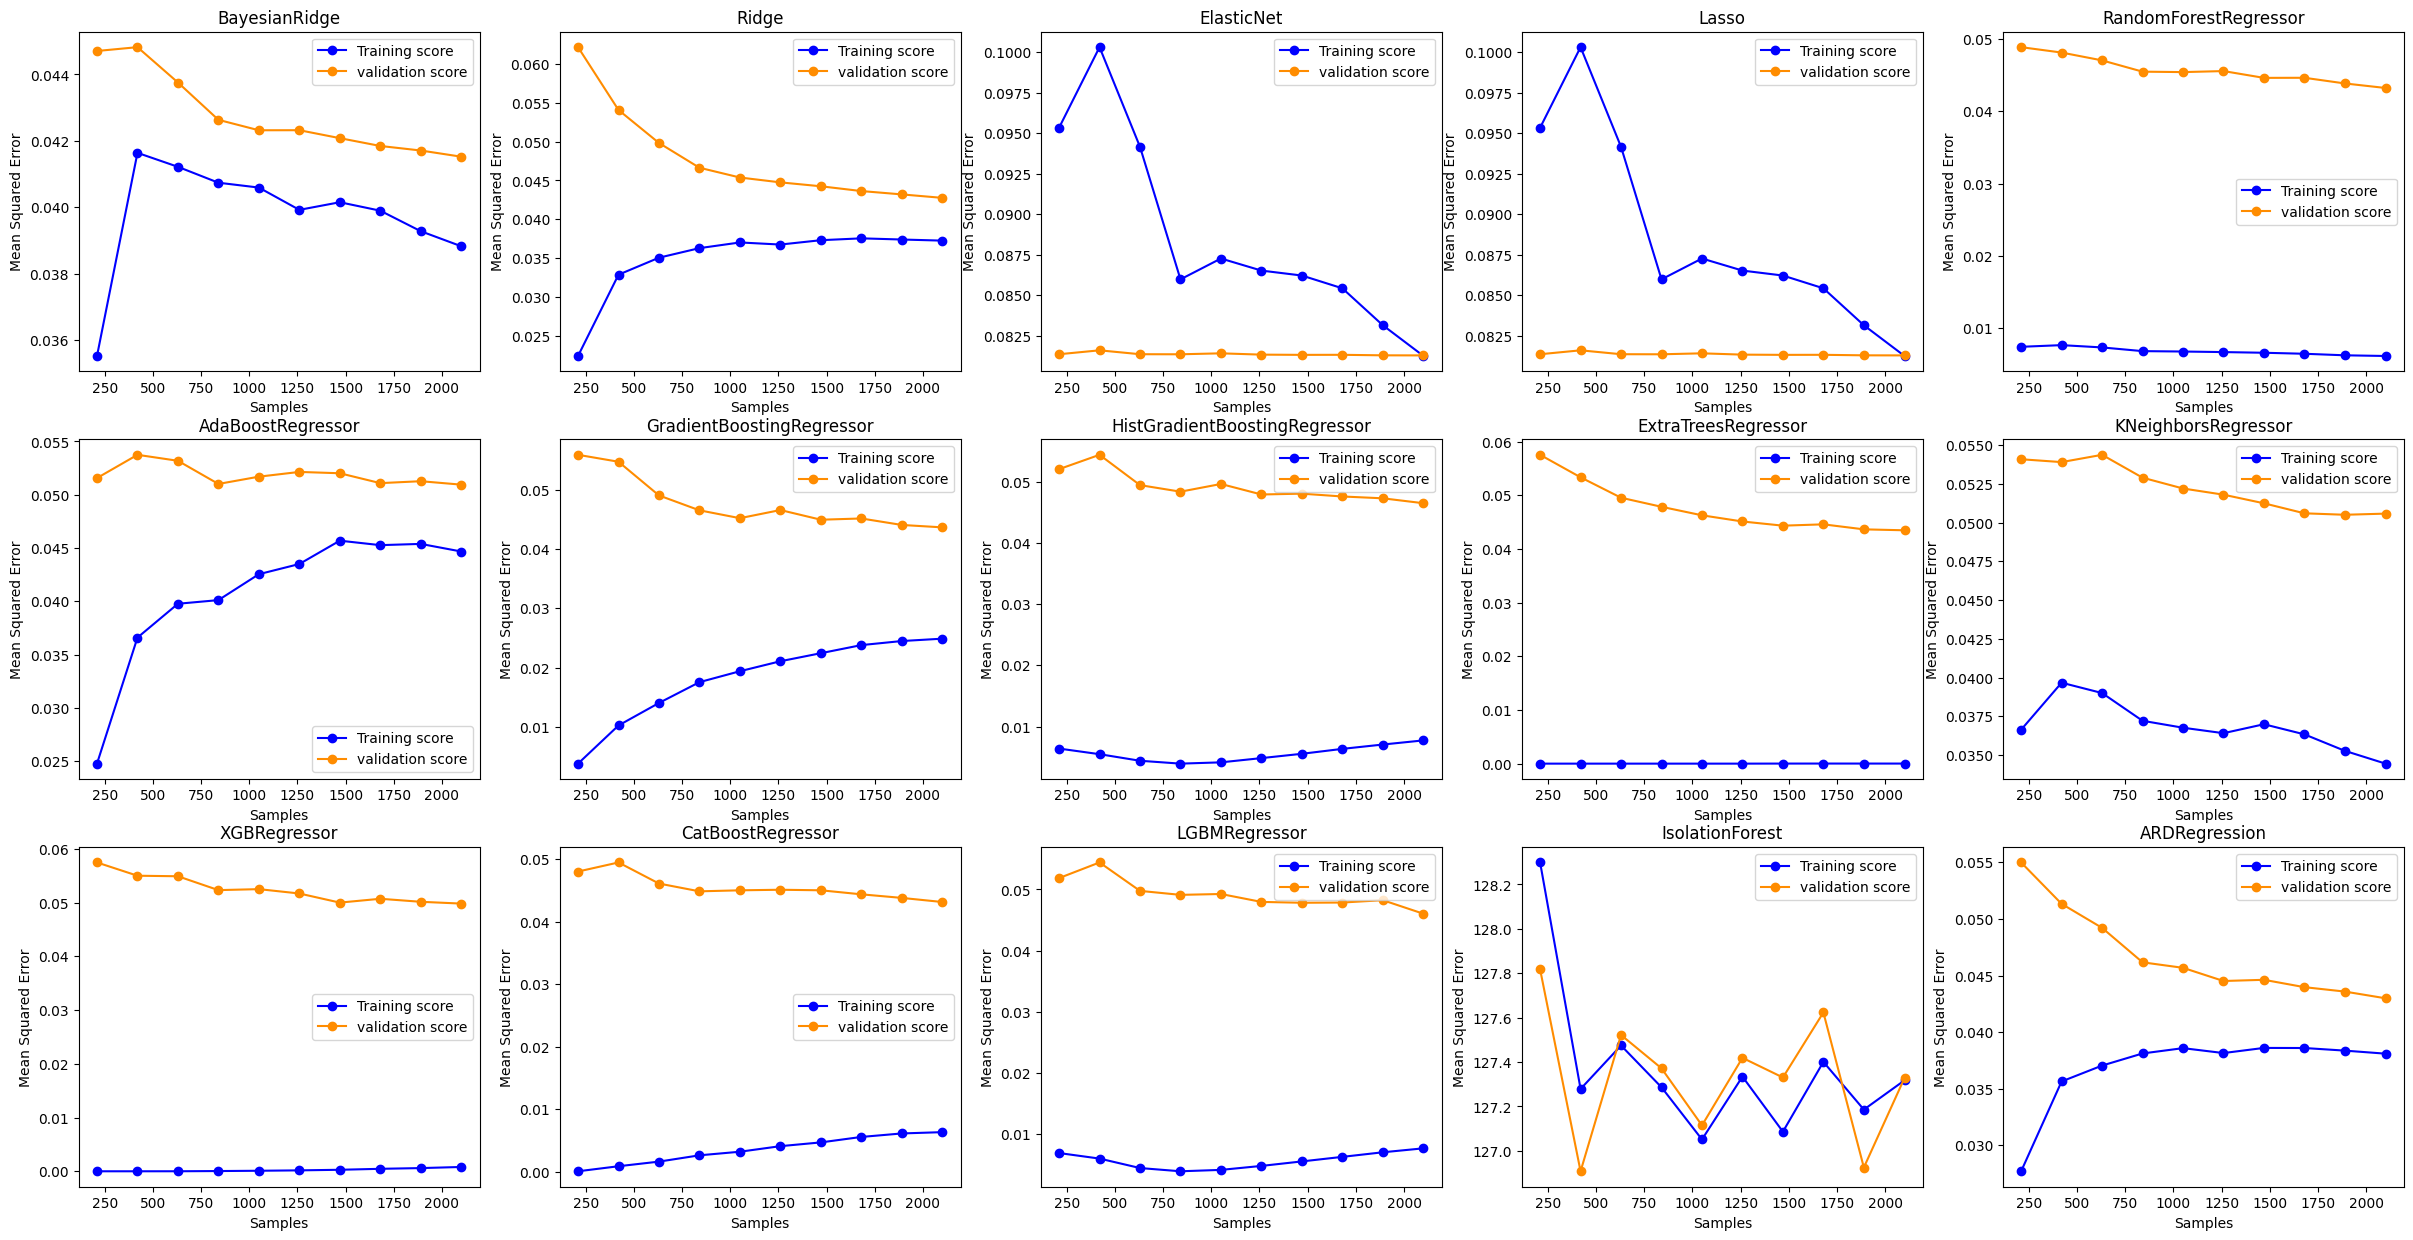

In [163]:
trainer.plot_learning_curves()

# Prédiction

In [164]:
best_model = trainer.best_estimator_
best_model.fit(X_train, y_log)

prediction = np.exp(best_model.predict(X_test))
df_test_target["Prediction"] = prediction

In [165]:
df_test_target.head(5)

,SalePrice,Prediction
Id,,
2438,180096.931198,149808.651534
2471,192686.931748,207450.082424
2360,158151.985049,134579.999875
790,187500.000000,216041.954146
1643,172023.677782,189048.822702
